In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')

In [2]:
df=pd.read_csv("data/HR_analysis.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [7]:
front=df.turnover
df.drop(['turnover'], axis=1, inplace=True)
df.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'promotion', 'department', 'salary'],
      dtype='object')

In [8]:
df.insert(0, 'turnover',front)
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary'],
      dtype='object')

In [9]:
print(df.shape)
print(df.dtypes)

(14999, 10)
turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object


In [10]:
# number of rows
df.shape[0]==len(df)

True

In [11]:
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [12]:
turnover_rate=df.turnover.value_counts()/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [13]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [14]:
df.groupby(['turnover']).mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
df.groupby('turnover').min()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,,,,,,,,,
0,0.12,0.36,2,96,2,0,0,IT,high
1,0.09,0.45,2,126,2,0,0,IT,high


In [16]:
turnover_summary=df.groupby(['turnover']).mean()
print(type(turnover_summary))
turnover_summary

<class 'pandas.core.frame.DataFrame'>


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [17]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [18]:
corr1=df.corr()
corr1

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


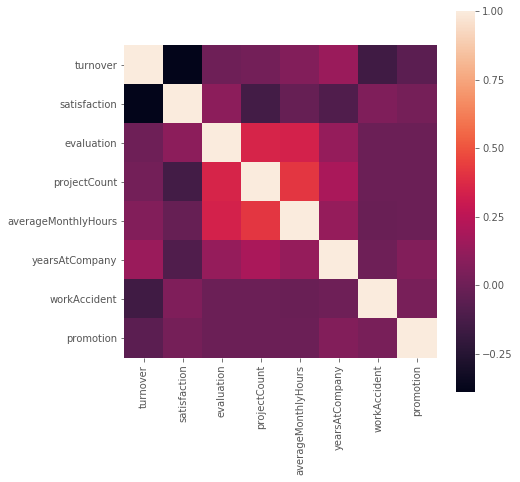

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(corr1, square=True)

In [20]:
df.satisfaction[df.turnover==1].mean()

0.44009801176141139

In [22]:
df.satisfaction[df.turnover==1].describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction, dtype: float64

In [23]:
emp_population = df.satisfaction.mean()
emp_turnover_satisfaction=df[df.turnover==1]['satisfaction'].mean()
print("overall satisfaction: %.3f" % emp_population)
print("turnover satisfaction: %.3f" %emp_turnover_satisfaction)

overall satisfaction: 0.613
turnover satisfaction: 0.440


In [24]:
# conduct t test
import scipy.stats as stats

In [25]:
stats.ttest_1samp(df.satisfaction[df.turnover==1], popmean=emp_population)

Ttest_1sampResult(statistic=-39.10948894348423, pvalue=9.0127811954355001e-279)

In [26]:
degree_freedom=len(df[df.turnover==1])
print("t distribution 1st and 3 quartiles are: %.3f and %.3f" %
      (stats.t.ppf(0.025, degree_freedom), stats.t.ppf(0.975, degree_freedom)))

t distribution 1st and 3 quartiles are: -1.961 and 1.961


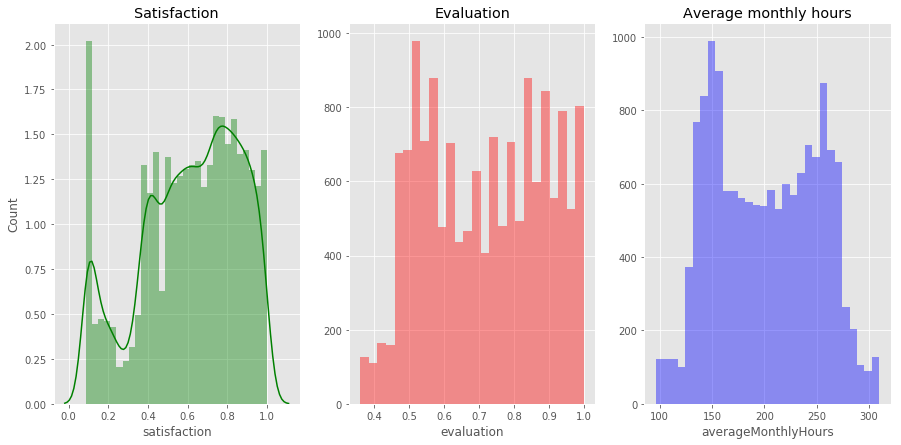

In [27]:
f, axes=plt.subplots(1,3, figsize=(15,7))
sns.distplot(df.satisfaction, kde=True, color='g',ax=axes[0]).set_title("Satisfaction")
sns.distplot(df.evaluation, kde=False, color='r',ax=axes[1]).set_title("Evaluation")
sns.distplot(df.averageMonthlyHours, kde=False, color='b', ax=axes[2]).set_title('Average monthly hours')
axes[0].set_ylabel('Count')

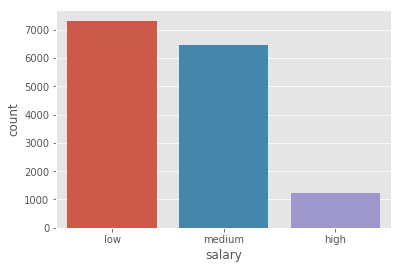

In [28]:
sns.countplot(df.salary)

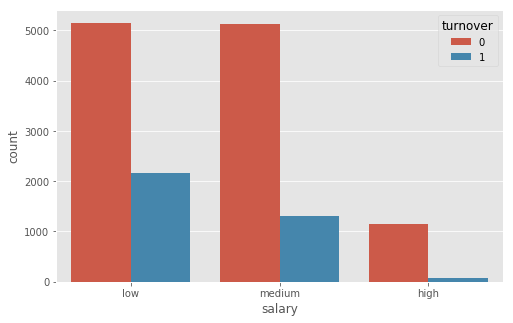

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df.salary, hue=df.turnover)

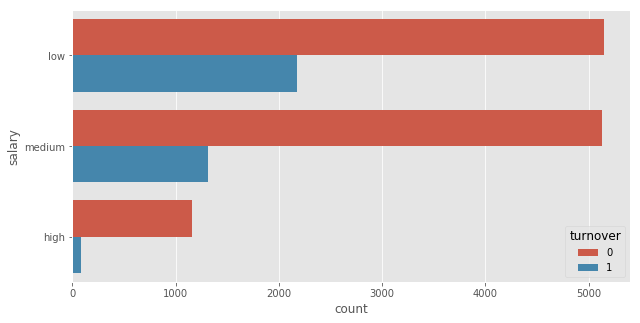

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(y='salary', hue='turnover', data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

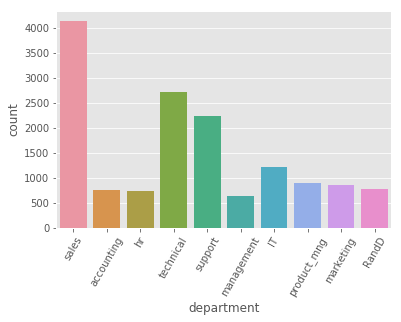

In [31]:
sns.countplot(df.department)
plt.xticks(rotation=60)

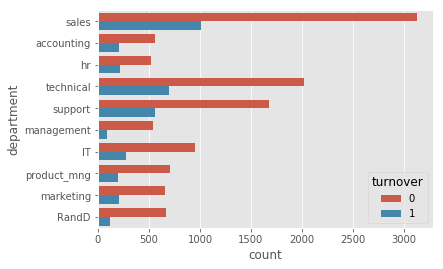

In [32]:
sns.countplot(y=df.department, hue=df.turnover)

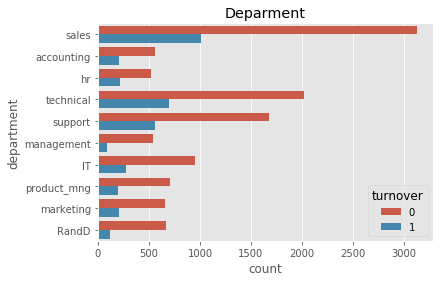

In [33]:
sns.countplot(y='department', hue='turnover',data=df).set_title("Deparment")

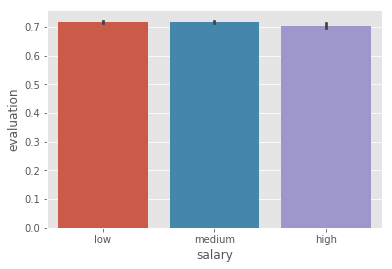

In [34]:
sns.barplot(x='salary',y='evaluation', data=df)

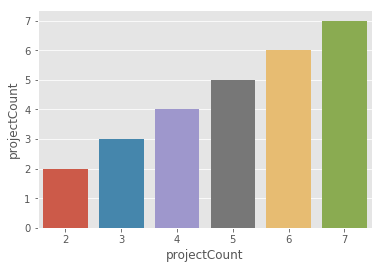

In [35]:
sns.barplot(df.projectCount, df.projectCount)

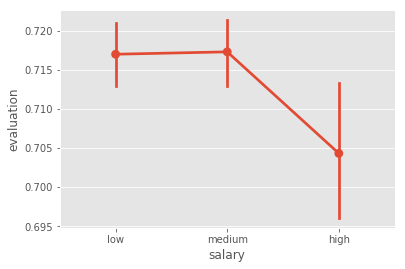

In [38]:
sns.pointplot(x='salary',y='evaluation',data=df)

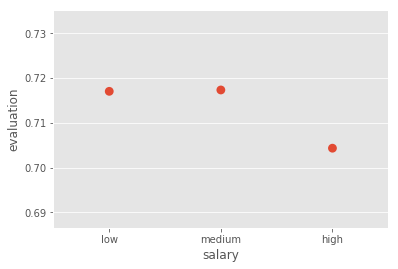

In [41]:
sns.pointplot(x='salary',y='evaluation',data=df, ci=None, join=False)

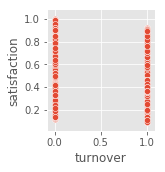

In [43]:
sns.pairplot(df, x_vars='turnover', y_vars='satisfaction')

In [48]:
df.projectCount.describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: projectCount, dtype: float64

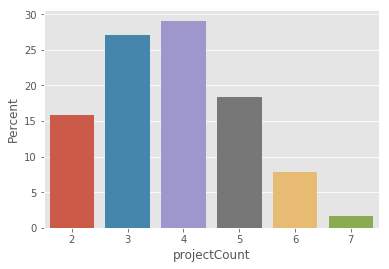

In [49]:
ax=sns.barplot(df.projectCount, df.projectCount, estimator=lambda x: len(x)/len(df)*100)
#ax.set(ylabel='Percent')
ax.set_ylabel('Percent')

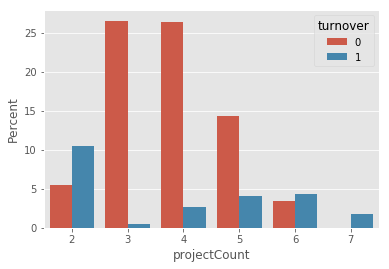

In [50]:
ax=sns.barplot(df.projectCount, df.projectCount, hue=df.turnover, estimator=lambda x: len(x)/len(df)*100)
#ax.set(ylabel='Percent')
ax.set_ylabel('Percent')

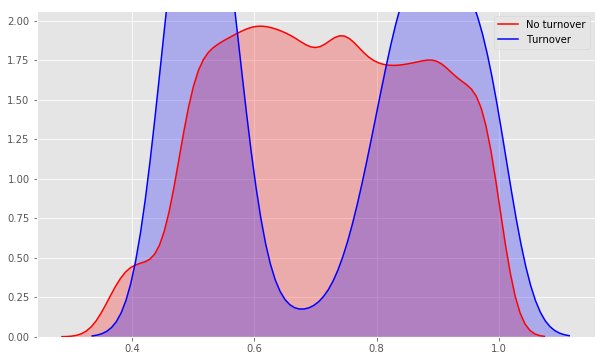

In [51]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.evaluation[df.turnover==0], color='r', shade=True, label='No turnover')
sns.kdeplot(df.evaluation[df.turnover==1], color='b', shade=True, label='Turnover')

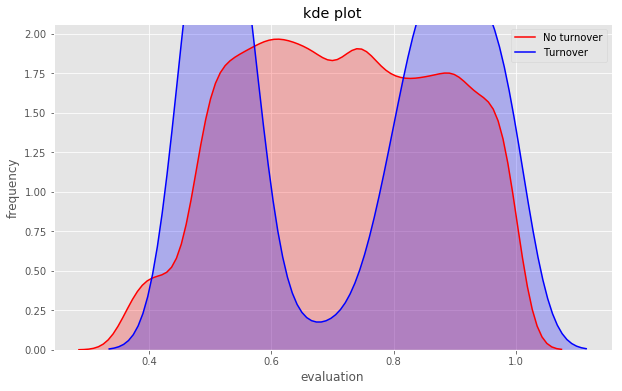

In [52]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df.turnover==0]['evaluation'], color='r',shade=True, label='No turnover')
ax=sns.kdeplot(df[df.turnover==1]['evaluation'],color='b',shade=True, label='Turnover')
ax.set_ylabel('frequency')
ax.set_xlabel('evaluation')
plt.title('kde plot')

In [59]:
a=df.satisfaction[df.turnover==0]==df[df.turnover==0]['satisfaction']
a.unique()

array([ True], dtype=bool)

In [60]:
np.unique(df.satisfaction[df.turnover==0]==df[df.turnover==0]['satisfaction'])

array([ True], dtype=bool)

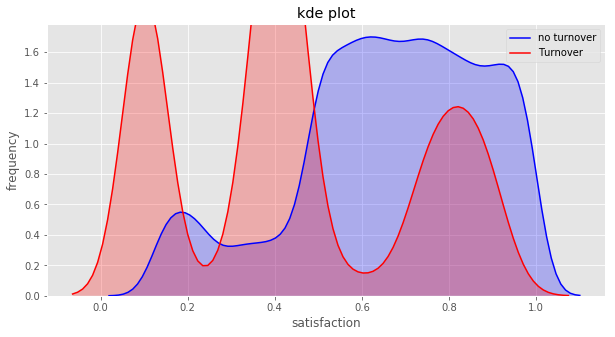

In [61]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df.turnover==0]['satisfaction'],color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df[df.turnover==1]['satisfaction'],color='r',shade=True, label='Turnover')
ax.set_xlabel('satisfaction')
ax.set_ylabel('frequency')
plt.title('kde plot')

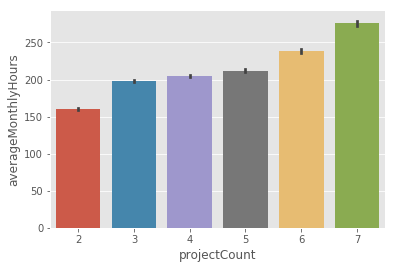

In [63]:
sns.barplot(df.projectCount, df.averageMonthlyHours, estimator=lambda x: x.mean())

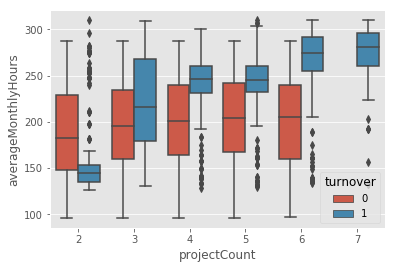

In [64]:
sns.boxplot(df.projectCount, df.averageMonthlyHours, hue=df.turnover)

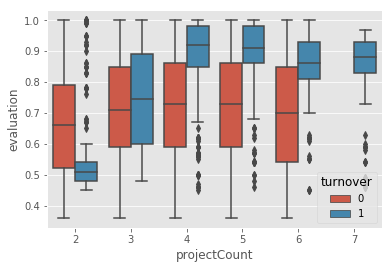

In [65]:
sns.boxplot(x='projectCount',y='evaluation',hue='turnover',data=df)

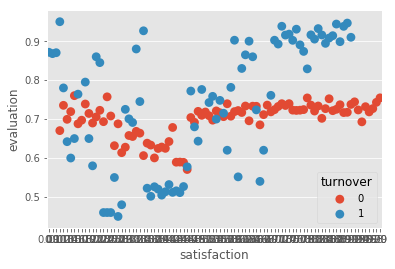

In [66]:
sns.pointplot(df.satisfaction,df.evaluation, hue=df.turnover,ci=None, join=False)

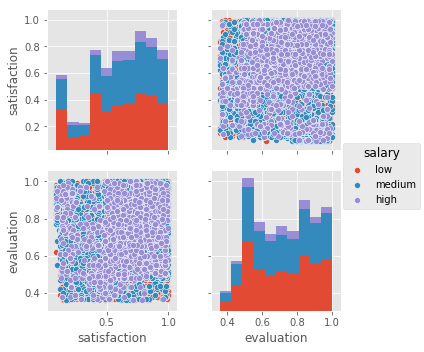

In [88]:
sns.pairplot(data=df[['satisfaction','evaluation', 'salary']], hue='salary')

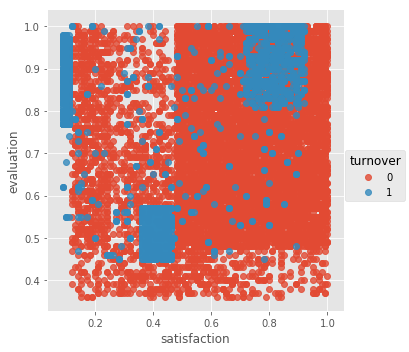

In [89]:
sns.lmplot(x='satisfaction',y='evaluation', data=df, hue='turnover',fit_reg=False)

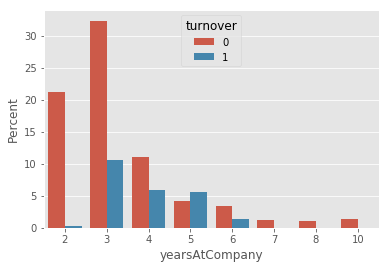

In [90]:
sns.barplot(x='yearsAtCompany',y='yearsAtCompany', hue='turnover',data=df, estimator=lambda x: len(x)/len(df)*100)\
.set_ylabel('Percent')

In [91]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[['satisfaction','evaluation']][df.turnover==1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [92]:
kmeans.cluster_centers_

array([[ 0.80851586,  0.91170931],
       [ 0.41014545,  0.51698182],
       [ 0.11115466,  0.86930085]])

In [93]:
from sklearn.cluster import KMeans
kmean2=KMeans(n_clusters=3, random_state=2)
kmean2.fit(df[df.turnover==1][['satisfaction','evaluation']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [95]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 1])

In [96]:
kmean2.cluster_centers_

array([[ 0.80851586,  0.91170931],
       [ 0.41014545,  0.51698182],
       [ 0.11115466,  0.86930085]])

In [97]:
k_color=[ 'green' if c==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]

In [99]:
k_color=['green' if l==0 else 'blue' if l==2 else 'red' for l in kmeans.labels_]
#k_color

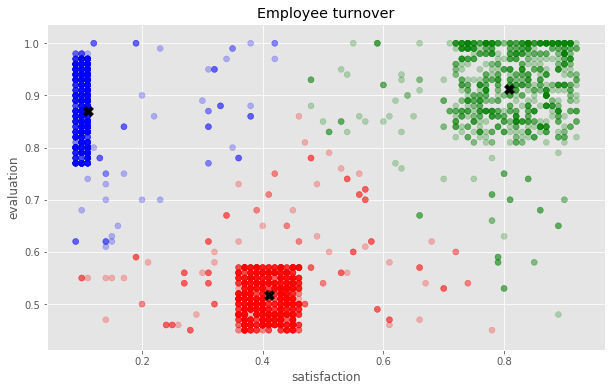

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(x='satisfaction',y='evaluation', data=df[df.turnover==1], color=k_color, alpha=0.25)
plt.xlabel('satisfaction')
plt.ylabel('evaluation')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='X', s=100)
plt.title('Employee turnover')
plt.show()

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=(12,6)

In [118]:
trans=df.department.astype('category').cat.codes
trans.value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
trans2=lb.fit_transform(df.department)
trans2

array([7, 7, 7, ..., 8, 8, 8], dtype=int64)

In [122]:
lb.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [123]:
df['department1']=trans2

In [124]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,sales,low,7
1,1,0.80,0.86,5,262,6,0,0,sales,medium,7
2,1,0.11,0.88,7,272,4,0,0,sales,medium,7
3,1,0.72,0.87,5,223,5,0,0,sales,low,7
4,1,0.37,0.52,2,159,3,0,0,sales,low,7


In [125]:
df['department']=trans2
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,7,low,7
1,1,0.80,0.86,5,262,6,0,0,7,medium,7
2,1,0.11,0.88,7,272,4,0,0,7,medium,7
3,1,0.72,0.87,5,223,5,0,0,7,low,7
4,1,0.37,0.52,2,159,3,0,0,7,low,7


In [126]:
df.salary=lb.fit_transform(df.salary)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,7,1,7
1,1,0.80,0.86,5,262,6,0,0,7,2,7
2,1,0.11,0.88,7,272,4,0,0,7,2,7
3,1,0.72,0.87,5,223,5,0,0,7,1,7
4,1,0.37,0.52,2,159,3,0,0,7,1,7


In [127]:
X=df.drop(['department1', 'turnover'], axis=1)
y=df.turnover

In [128]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)

In [129]:
tree=DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01)
tree.fit(x_train, y_train)
importance=tree.feature_importances_

In [130]:
importance

array([  5.09312879e-01,   8.34015961e-02,   1.33111573e-02,
         3.41916368e-02,   3.56607085e-01,   0.00000000e+00,
         0.00000000e+00,   3.11391180e-03,   6.17342988e-05])

In [131]:
feat_name=X.columns
feat_name

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'promotion', 'department', 'salary'],
      dtype='object')

In [136]:
ls=np.array([3,6,2,4,1,7,5])
ls

array([3, 6, 2, 4, 1, 7, 5])

In [135]:
ls[:-3]

array([3, 6, 2, 4])

In [134]:
ls[-3:]

array([1, 7, 5])

In [137]:
ls[::-1]

array([5, 7, 1, 4, 2, 6, 3])

In [138]:
ls[::-2]

array([5, 1, 2, 3])

In [141]:
sorted(importance, key=lambda x: -x)

[0.50931287854953955,
 0.35660708516532352,
 0.08340159607124463,
 0.034191636790210714,
 0.013311157320327728,
 0.0031139118046015803,
 6.1734298752220718e-05,
 0.0,
 0.0]

In [142]:
np.argsort(importance)

array([5, 6, 8, 7, 2, 3, 1, 4, 0], dtype=int64)

In [143]:
indices=np.argsort(importance)[::-1]
indices

array([0, 4, 1, 3, 2, 7, 8, 6, 5], dtype=int64)

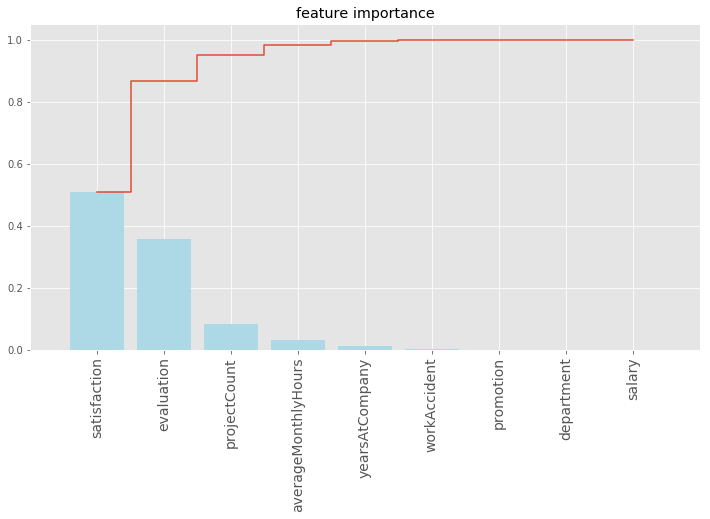

In [144]:
plt.figure(figsize=(12,6))
plt.title("feature importance")
plt.bar(range(len(indices)), importance[indices],color='lightblue')
plt.step(range(len(indices)), np.cumsum(importance[indices]), where='mid')
plt.xticks(range(len(indices)), feat_name, rotation=90, fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()